In [2]:
import tokenize
import pydriller as pyd
import pandas as pd
from datetime import datetime
import ast

In [4]:
tf_dt1 = datetime(2018, 11, 1)
tf_dt2 = datetime(2019, 12, 1)
tf_source = pd.DataFrame(columns=['commit_ID', 'Author','msg', 'Commit_before', 'Commit_after'])
#tf_bug = pd.DataFrame(columns=['commit_ID', 'Author','msg', 'Commit_before', 'Commit_after'])
path = "https://github.com/tensorflow/tensorflow.git"
Authors = ['Derek Murray',
'Gunhan Gulsoy',
'Shanqing Cai',
'Peter Hawkins',
'Alexandre Passos',
'ebrevdo',
'Allen Lavoie',
'Dan Moldovan',
'Lei Zhang',
'Jiri Simsa',
'Yifei Feng',
'Suharsh Sivakumar',
'Eugene Zhulenev',
'Oleksandr "Alex" Zinenko',
'Pete Warden',
'Jared Duke',
'Jonathan Hseu',
'Benjamin Kramer',
'Mihai Maruseac',
'Yan Facai',
'Yu-Cheng Ling',
'Yuefeng Zhou',
'Smit Hinsu',
'George Karpenkov',
'Andrew Selle',
'Yong Tang',
'River Riddle',
'Sanjoy Das',
'Justin Lebar',
'Jacques Pienaar',
'Anna Revinskaya',
'Martin Wicke',
'Asim Shankar',
'Guangda Lai',
'Mark Daoust']


In [5]:
for commit in pyd.RepositoryMining(path_to_repo=path, since=tf_dt1, to=tf_dt2, only_authors=Authors).traverse_commits():
    for modified_file in commit.modifications:
        if modified_file.filename.endswith(".py"):
            tf_source = tf_source.append({'commit_ID': commit.hash, 'Author': commit.author.name,
                                          'msg': commit.msg,'Commit_before': modified_file.source_code_before,
                                          'Commit_after': modified_file.source_code}, ignore_index=True)
                #print("Code", commit.hash, commit.author.name, commit.msg,commit.author_date,
                        # modified_file.filename, flush=True)

Exception ignored in: <finalize object at 0x29472c77dd0; dead>
Traceback (most recent call last):
  File "c:\users\morad\anaconda3\lib\weakref.py", line 552, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "c:\users\morad\anaconda3\lib\tempfile.py", line 795, in _cleanup
    _shutil.rmtree(name)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 513, in rmtree
    return _rmtree_unsafe(path, onerror)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 392, in _rmtree_unsafe
    _rmtree_unsafe(fullname, onerror)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 392, in _rmtree_unsafe
    _rmtree_unsafe(fullname, onerror)
  File "c:\users\morad\anaconda3\lib\shutil.py", line 392, in _rmtree_unsafe
    _rmtree_unsafe(fullname, onerror)
  [Previous line repeated 1 more time]
  File "c:\users\morad\anaconda3\lib\shutil.py", line 397, in _rmtree_unsafe
    onerror(os.unlink, fullname, sys.exc_info())
  File "c:\users\morad\anaconda3\lib\shutil.py", line 39

In [8]:
#importing data into csv file
tf_source.to_csv(r'C:\GH-Dataset\tsflow_source_before_after.csv', index=None, header=True)

In [9]:
tf_source.shape

(7039, 5)

In [1282]:
class FuncParser_onlycall(ast.NodeVisitor):
    def visit_Import(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_ImportFrom(self, node):
        if(node.module != None):
            n3= (node.module)
            file_contents.append([n3])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_alias(self, node): 
        n1 =  (node.name)
        file_contents.append([n1])
        if(node.asname != None):
            n2 = (node.asname)
            file_contents.append([n2])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Call(self, node): 
        attrib = node.func
        if(attrib.__class__.__name__ == 'Attribute'):
            file_contents.append([attrib.attr])
    def generic_visit(self, node):
        ast.NodeVisitor.generic_visit(self, node)
    

In [1423]:
stop_word = {'ctx','value','name','values','kw_defaults','kwonlyargs','kwarg','n','body','args', 'defaults', 'vararg', 'arguments'}
class FuncParser(ast.NodeVisitor):
    def visit_Load(self, node): pass
    def visit_Store(self, node): pass
    def visit_Str(self, node): pass
    def visit_Num(self, node): pass
    def visit_Module(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_arguments(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Expr(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Assign(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_FunctionDef(self,node):
        file_contents.append([node.__class__.__name__])
        file_contents.append([node.name])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Call(self, node): 
        attrib = node.func
        if(attrib.__class__.__name__ == 'Attribute'):
            file_contents.append([attrib.attr])
        elif (attrib.__class__.__name__ == 'Name'):
            file_contents.append([attrib.id])
    def visit_arg(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_BinOp(self,node):
        temp = (node.op)
        op = "BinOp: "+temp.__class__.__name__ +"()"
        file_contents.append([op])
    def visit_Import(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_ImportFrom(self, node):
        if(node.module != None):
            n3= (node.module)
            file_contents.append([n3])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_alias(self, node): 
        n1 =  (node.name)
        file_contents.append([n1])
        if(node.asname != None):
            n2 =  (node.asname)
            file_contents.append([n2])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Name(self, node):
       # temp ="Name:"+node.id
        #file_contents.append([node.id])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Attribute(self, node): 
        #temp1 ="Name:"+node.attr
        file_contents.append([node.attr])
        ast.NodeVisitor.generic_visit(self, node)
    def generic_visit(self, node):
        file_contents.append([node.__class__.__name__])
        #for f in node._fields:
           # if(not f in stop_word):     
              #  file_contents.append([f])
        #ast.iter_fields(node)
        ast.NodeVisitor.generic_visit(self, node)

In [119]:
#First we need to put the 'commit_before' and 'commit_after' into two different text file
#becuase AST accept a string which is a read line by line of a code file. but while we store the commit in a cell of dataframe, it is not able to be read line by line
text_before=tf_source['Commit_before'][1]
text_after=tf_source['Commit_after'][1]
before = open("before-commit.py", "w+")
after = open("after-commit.py", "w+")
before.write(text_before)
after.write(text_after)

226301

In [1424]:
with tokenize.open("co.py") as sf:  # need the tokenize.open for source files and not a string
    source_file_before = sf.read()

ast_before = ast.parse(source_file_before)
bf_obj = FuncParser()
bf_tree = ast.parse(ast_before)
file_contents = []
bf_obj.visit(bf_tree)

In [1289]:
for node in ast.walk(bf_tree):
    print(node.__class__.__name__)

Module
FunctionDef
arguments
Assign
If
Return
arg
Name
Num
BoolOp
Assign
If
Name
Store
Or
Name
Call
Name
Call
Compare
Assign
Load
Load
Name
Name
Name
Store
Name
Call
Name
Eq
Num
Name
Call
Load
Load
Load
Load
Attribute
Load
Store
Name
Name
Name
Load
Load
Load
Load


In [1308]:
print(ast.dump(bf_tree))

Module(body=[ImportFrom(module='sklearn.feature_extraction.text', names=[alias(name='TfidfTransformer', asname=None)], level=0), Assign(targets=[Name(id='X_train_tokens', ctx=Store())], value=Call(func=Attribute(value=Name(id='data', ctx=Load()), attr='drop', ctx=Load()), args=[List(elts=[Str(s='commit_Author'), Str(s='commit_msg')], ctx=Load())], keywords=[keyword(arg='axis', value=Num(n=1))])), Assign(targets=[Name(id='tfidf_transformer', ctx=Store())], value=Call(func=Name(id='TfidfTransformer', ctx=Load()), args=[], keywords=[keyword(arg='use_idf', value=NameConstant(value=True))])), Expr(value=Call(func=Attribute(value=Name(id='tfidf_transformer', ctx=Load()), attr='fit_transform', ctx=Load()), args=[Name(id='X_train_tokens', ctx=Load())], keywords=[]))])


In [1425]:
file_contents

[['FunctionDef'],
 ['dict_keys_to_ordered_list'],
 ['If'],
 ['BoolOp'],
 ['Or'],
 ['isinstance'],
 ['list'],
 ['If'],
 ['Compare'],
 ['Eq'],
 ['try_sort'],
 ['BinOp: Add()'],
 ['Return']]

In [15]:
#here we count the number of tokens for 'before-commit' file
dtobj_bfore = pd.DataFrame(file_contents, columns=['token'])

tokens_before =pd.DataFrame(dtobj_bfore['token'].value_counts())
tokens_before

,token
ImportFrom:tensorflow.python.framework,11
ImportFrom:tensorflow.python.util,8
ImportFrom:tensorflow.core.framework,6
ImportFrom:__future__,3
ImportFrom:tensorflow.python.eager,3
...,...
Import:op_def_registry,1
Import:copy,1
Import:memory,1
Import:config_pb2,1


In [16]:
with tokenize.open("after-commit.py") as sf:  # need the tokenize.open for source files and not a string
    source_file_after = sf.read()

after = ast.parse(source_file_after)
ast_after = ast.parse(source_file_after)
aft_obj = FuncParser()
aft_tree = ast.parse(ast_after)
file_contents = []
aft_obj.visit(aft_tree)

In [17]:
dtobj_after = pd.DataFrame(file_contents, columns=['token'])

tokens_after =pd.DataFrame(dtobj_after['token'].value_counts())
tokens_after

,token
ImportFrom:tensorflow.python.framework,11
ImportFrom:tensorflow.python.util,8
ImportFrom:tensorflow.core.framework,6
ImportFrom:__future__,3
ImportFrom:tensorflow.python.eager,3
...,...
Import:op_def_registry,1
Import:copy,1
Import:memory,1
Import:config_pb2,1


In [18]:
diff = tokens_after.subtract(tokens_before)

In [19]:
diff_token = diff[(diff.select_dtypes(include=['number']) != 0).any(1)]
diff_token=diff_token.fillna(0)
diff_token= diff_token.abs()
diff_token = diff_token.reset_index()
diff_token

,index,token


In [232]:
df_author_token = pd.DataFrame(columns=['Author','msg', 'tokens', 'counts'])

In [233]:
df_author_token = df_author_token.append({'Author':tf_source['Author'][1],'msg':tf_source['msg'][1]
                                         ,'tokens':diff_token['index'],'counts':diff_token['token']},ignore_index=True)

In [234]:
df_author_token

,Author,msg,tokens,counts
0,Allen Lavoie,Tweak to colocate_with when executing eagerly ...,0 Import:combinations 1 Import:pa...,0 0.0 1 0.0 2 0.0 3 0.0 Name: toke...


In [235]:
x=df_author_token['tokens'][0]
y=df_author_token['counts'][0]

In [236]:
vocab = {}
i = 1
for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1
print(vocab)

{'Import:combinations': 1, 'Import:parameterized': 2, 'Import:test_util': 3, 'ImportFrom:absl.testing': 4}


In [237]:
one = [df_author_token['Author'][0]]+[0]*len(vocab)
one

['Allen Lavoie', 0, 0, 0, 0]

In [238]:
# here I try to count the number of each vocab in diff_token of each commit per developer
i=0
for word in x:
    one[vocab[word]]+=y[i]
    i+=1
    
one

['Allen Lavoie', 0.0, 0.0, 0.0, 0.0]

In [1426]:
#create a new list to repeat all above steps in a loop function
df_author_token = pd.DataFrame(columns=['Author','msg', 'tokens', 'counts'])

In [1427]:
i=0
error=0
vocab = {}
j = 1
for row in tf_source.iterrows():
    if tf_source['Commit_before'][i] is not None:
        text_before=tf_source['Commit_before'][i]
    if tf_source['Commit_after'][i] is not None:
        text_after=tf_source['Commit_after'][i]
    before = open("before-commit.py", "w+")
    after = open("after-commit.py", "w+")
    try:
        before.write(text_before)
    except ValueError:
        #print("Oops!  Error in writing to the before file #",i)
        error+=1
    try:
        after.write(text_after)
    except ValueError:
        #print("Oops!  Error in writing to the After file #",i)
        error+=1
    #this for commit before
    with tokenize.open("before-commit.py") as sf:  # need the tokenize.open for source files and not a string
        try:
            source_file_before = sf.read()
            ast_before = ast.parse(source_file_before)
        except ValueError:
            error+=1
            #print("Oops!  Error in before commit #",i)       
    bf_obj = FuncParser()
    bf_tree = ast.parse(ast_before)
    file_contents = []
    bf_obj.visit(bf_tree)
    #counting tokens in file before
    dtobj_bfore = pd.DataFrame(file_contents, columns=['token'])
    tokens_before =pd.DataFrame(dtobj_bfore['token'].value_counts())
    #doing the same for file after
    with tokenize.open("after-commit.py") as sf:  # need the tokenize.open for source files and not a string
        try:
            source_file_after = sf.read()
            ast_after = ast.parse(source_file_after)
        except ValueError:
            error+=1
            #print("Oops!  Error in after commit #",i)
    aft_obj = FuncParser()
    aft_tree = ast.parse(ast_after)
    file_contents = []
    aft_obj.visit(aft_tree)
    #counting
    dtobj_after = pd.DataFrame(file_contents, columns=['token'])
    tokens_after =pd.DataFrame(dtobj_after['token'].value_counts())
    #calculating the difference
    diff = tokens_after.subtract(tokens_before)
    diff_token = diff[(diff.select_dtypes(include=['number']) != 0).any(1)]
    diff_token=diff_token.fillna(0)
    diff_token= diff_token.abs()
    diff_token = diff_token.reset_index()
    df_author_token = df_author_token.append({'Author':tf_source['Author'][i],'msg':tf_source['msg'][i]
                                         ,'tokens':diff_token['index'],'counts':diff_token['token']},ignore_index=True)
    i+=1
    for word in diff_token['index']:
        if word in vocab:
            continue
        else:
            vocab[word]=j
            j+=1

In [1428]:
df_author_token.shape

(7039, 4)

In [1429]:
#number of vocab
j

24694

In [1430]:
import numpy as np

In [1431]:
vocab

{'TestCase': 1,
 'absl.testing': 2,
 'combinations': 3,
 'generate': 4,
 'parameterized': 5,
 'run_all_in_graph_and_eager_modes': 6,
 'test_util': 7,
 'If': 8,
 'Not': 9,
 'UnaryOp': 10,
 'hasattr': 11,
 'FunctionDef': 12,
 'Graph': 13,
 'ResourceVariable': 14,
 'With': 15,
 'as_default': 16,
 'assertEqual': 17,
 'assertRaises': 18,
 'copy_to_graph_uninitialized': 19,
 'run': 20,
 'run_in_graph_and_eager_modes': 21,
 'session': 22,
 'testCopyToGraphUninitialized': 23,
 'withitem': 24,
 'Return': 25,
 '_maybe_initialize_checkpointable': 26,
 'AssertionError': 27,
 'CheckpointableSaver': 28,
 'Compare': 29,
 'Continue': 30,
 'CopyFrom': 31,
 'Dict': 32,
 'For': 33,
 'Index': 34,
 'Is': 35,
 'IsNot': 36,
 'List': 37,
 'NameConstant': 38,
 'Raise': 39,
 'Subscript': 40,
 'Tuple': 41,
 '_map_captured_resources_to_created_resources': 42,
 '_map_function_inputs_to_created_inputs': 43,
 '_map_resources': 44,
 'append': 45,
 'checkpointable': 46,
 'context': 47,
 'dismantle_graph': 48,
 'freeze

In [1432]:
#creating an empty matrix in size of all commits and number of tokens and try to import the number of each token per commit and developer into a new dataset
vocab_range = len(vocab)+1
cv_token = pd.DataFrame(0, index=np.arange(len(df_author_token)), columns=vocab)

In [1433]:
cv_token['commit_Author'] =0
cv_token['commit_msg']=0

In [1434]:
#this is an empty matrix of tokens
cv_token

,TestCase,absl.testing,combinations,generate,parameterized,run_all_in_graph_and_eager_modes,test_util,If,Not,UnaryOp,...,testParseSingleExample,testReshape,testTranspose,testUnaryBitwiseOperations,testUnaryComplexOperations,testUnaryLogicalOperations,testUnaryRealOperations,testUnstack,commit_Author,commit_msg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
 #vocab['orelse']

In [1435]:
x=0
for row in df_author_token.iterrows():
    y=0
    temp_token = df_author_token['tokens'][x]
    temp_count = df_author_token['counts'][x]
    for word in temp_token:
        if temp_count[y] == 0:
            cv_token[word][x]+=1
            y+=1
        else:
            cv_token[word][x]+=temp_count[y]
            y+=1
    cv_token['commit_Author'][x]=df_author_token['Author'][x]
    cv_token['commit_msg'][x]=df_author_token['msg'][x]
    x+=1
    

c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\morad\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_p

In [320]:
cv_token.to_csv(r'C:\GH-Dataset\tf_calls_tokens.csv', index=None, header=True)

In [1636]:
cv_token =  pd.read_csv('tf_calls_tokens.csv')

In [1637]:
X_train_tokens  = cv_token.drop(['commit_Author','commit_msg'], axis=1)

In [1640]:
train_token_all.shape

(7039, 2062)

In [1638]:
train_token_all=X_train_tokens.loc[:, (X_train_tokens.astype(bool).sum(axis=0)>4)]

In [1641]:
test=train_token_all.columns.values

In [1624]:
test

array(['absl.testing', 'combinations', 'generate', ...,
       '_readAndCheckGraphExecutionTracesFile', '_readAndCheckGraphsFile',
       '_readAndCheckSourceFilesAndStackFrames'], dtype=object)

In [1642]:
#list_all_vocab = list(train_token_all.columns.values)

In [1643]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(train_token_all)

In [1644]:
all_train_tfidf=  pd.DataFrame(X_train_tfidf.toarray(),columns=test)

In [1647]:
all_train_tfidf['commit_Author'] = cv_token['commit_Author']

In [1649]:
#all_train_tfidf

In [1136]:
all_train_tfidf[all_train_tfidf>=0.0001] = 1

In [1137]:
all_train_tfidf[all_train_tfidf<0.0001] = 0

In [1142]:
all_train_tfidf.shape

(7039, 2062)

In [1620]:
all_train_tfidf =  pd.read_csv('tf_calls_tokens.csv')

In [1650]:
all_train_tfidf_cl= all_train_tfidf.loc[:, (all_train_tfidf.astype(bool).sum(axis=0)>5)]

In [1651]:
all_train_tfidf_cl.shape

(7039, 1759)

In [352]:
train_token_cl=X_train_tokens.loc[:, (X_train_tokens.astype(bool).sum(axis=0)>5)]

In [1635]:
train_token_cl

,TestCase,absl.testing,combinations,generate,parameterized,run_all_in_graph_and_eager_modes,test_util,If,Not,UnaryOp,...,logical_xor,uniquify,requests,equality_fn,gradients_function,flat,next_batch,glob,saveable,int_shape
0,1,0,0,0,0,0,2,106,24,27,...,0,0,0,0,0,0,0,0,0,0
1,33,7,1,1,7,1,19,1190,191,202,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,1,0,3,61,7,8,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,21,13,13,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,6,1,2,...,0,0,0,0,0,0,0,0,0,0
5,29,4,0,1,4,3,14,826,107,152,...,0,0,0,0,0,0,0,0,0,0
6,2,1,0,0,1,0,0,141,30,37,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,7,2,3,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,7,5,5,...,0,0,0,0,0,0,0,0,0,0
9,7,1,3,3,1,0,2,148,51,55,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#X_train_tokens  = cv_token.drop(['commit_Author','commit_msg'], axis=1)
from gensim.models import LogEntropyModel
from math import log, e

In [1652]:
Author_groupby=all_train_tfidf_cl.groupby(['commit_Author']).sum().reset_index()

In [1653]:
Author_groupby

,commit_Author,absl.testing,combinations,generate,parameterized,test_util,Graph,ResourceVariable,as_default,assertEqual,...,define_loss,StateSpaceModelConfiguration,feature_keys,state_space_model,tensorflow.contrib.timeseries.python.timeseries.state_space_models,ForwardAccumulator,FlushExecutionFiles,FlushNonExecutionFiles,_readAndCheckGraphsFile,_readAndCheckSourceFilesAndStackFrames
0,Alexandre Passos,0.000000,0.000000,0.000000,0.000000,0.706225,0.000000,4.313985,2.818776,6.799246,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,Allen Lavoie,1.327516,0.478558,0.456084,1.329920,2.916159,3.895553,2.370826,7.565115,36.183252,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.98646,0.000000,0.000000,0.000000,0.000000
2,Andrew Selle,0.084869,0.000000,0.000000,0.085022,0.223742,0.000000,0.093025,0.752964,1.668056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,Asim Shankar,0.000000,0.000000,0.000000,0.000000,0.881008,0.225905,0.000000,0.407231,0.751265,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,Benjamin Kramer,0.000000,0.000000,0.000000,0.000000,0.129029,0.147153,0.000000,0.117484,0.093398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,Dan Moldovan,0.283921,0.000000,0.489208,0.284435,2.072120,0.237796,0.315541,3.266759,25.474420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,Derek Murray,0.200233,0.000000,0.000000,0.200596,0.000000,0.000000,0.000000,0.643869,7.857586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,Eugene Zhulenev,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.781350,0.467417,1.575758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,George Karpenkov,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,Guangda Lai,0.257835,0.363449,0.346381,0.258302,0.152816,10.030206,0.167300,9.413925,8.257122,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [385]:
from sklearn.feature_extraction.text import TfidfTransformer

In [1660]:
X_train_tokens  = Author_groupby.drop(['commit_Author'], axis=1)

In [1661]:
X_train_tokens.shape

(31, 1758)

In [1662]:
train_token_cl=X_train_tokens.loc[:, (X_train_tokens.astype(bool).sum(axis=0)>2)]

In [1663]:
train_token_cl.shape

(31, 1141)

In [1664]:
#list_cl_vocab = list(train_token_cl.columns.values)

In [1569]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(train_token_cl)

In [1571]:
X_train_tfidf.mean()

0.003860732433599646

In [1572]:
dt_train_tfidf=  pd.DataFrame(X_train_tfidf.toarray(),columns=list_cl_vocab)

In [1364]:
#dt_train_tfidf

In [1574]:
#dt_train_tfidf

In [1666]:
train_token_cl[train_token_cl>0] = 1

c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1668]:
#train_token_cl

In [1675]:
train_token_cl [train_token_cl!=1] = 0 

c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1676]:
dt_train_tfidf_1 = train_token_cl

In [1677]:
dt_train_tfidf_all = pd.concat([train_token_cl, dt_train_tfidf_1])

In [1678]:
dt_all = pd.concat([train_token_cl, dt_train_tfidf_all])

In [1679]:
data_all=dt_all.reset_index()

In [1712]:
data_all_as= data_all.drop(['level_0','as_default','assertEqual','run','append','get','extend',
'tensorflow.python.ops','tensorflow.python.platform','constant','assertAllEqual','device','join','__future__',
   '__init__','os','ops','test','main','pop','split','division','tensorflow.python.framework','tensorflow.python.util'
    ,'test_util','session'],axis=1)

In [1681]:
data_all_as.shape

(93, 1141)

In [1803]:
data_all_as=data_all.drop(['level_0'],axis=1)

In [1241]:
#data_all_as

In [557]:
from mlxtend.frequent_patterns import apriori, association_rules

In [1491]:
#vocab['<_ast.Add object at 0x0000029460AF4630>']

In [1804]:
#association_rules_5 = apriori(X_train_tokens, min_support=0.5, min_length=2)
association_rules_5 = apriori(data_all_as, min_support=0.,use_colnames=True)

In [1805]:
association_rules_5['itemsets']

0                                         (assertEqual)
1                                              (append)
2                               (tensorflow.python.ops)
3                                                (join)
4                         (tensorflow.python.framework)
                            ...                        
78    (__future__, print_function, tensorflow.python...
79    (division, print_function, tensorflow.python.p...
80    (assertEqual, division, absolute_import, __fut...
81    (division, append, absolute_import, __future__...
82    (tensorflow.python.platform, division, absolut...
Name: itemsets, Length: 83, dtype: object

In [728]:
rules[['support','confidence']]

,support,confidence
0,0.709677,1.000000
1,0.709677,0.814815
2,0.709677,0.846154
3,0.709677,0.814815
4,0.741935,0.884615
...,...,...
447,0.709677,0.916667
448,0.709677,0.880000
449,0.709677,0.880000
450,0.709677,0.880000


In [1767]:
association_rules_5['length'] = association_rules_5['itemsets'].apply(lambda x: len(x))
frequent_itemsets = association_rules_5[ (association_rules_5['length'] >1) ]

In [1768]:
frequent_itemsets = frequent_itemsets.reset_index()


In [1769]:
#frequent_itemsets['itemsets'][41157]
frequent_itemsets
frequent_itemsets.to_csv(r'C:\GH-Dataset\callitem-g1.csv', index=None, header=True)

In [104]:
import matplotlib.pyplot as plt
import matplotlib

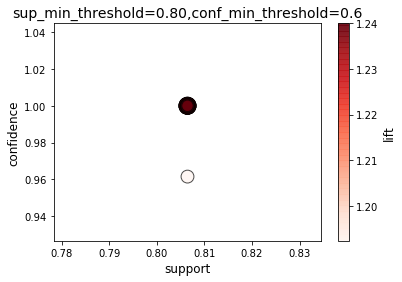

In [855]:
rng = np.random.RandomState(0)
x = rules['support']
y = rules['confidence']
colors = rules['lift']
sizes = 300 * rng.rand(452)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.7,
            cmap='Reds', edgecolors='black')
plt.title("sup_min_threshold=0.80,conf_min_threshold=0.6", fontsize=14)
plt.xlabel('support', fontsize=12)
plt.ylabel('confidence', fontsize=12)
clb = plt.colorbar()
clb.set_label("lift", fontsize=12)
plt.show();

c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


Text(0, 0.5, '#of itemset')

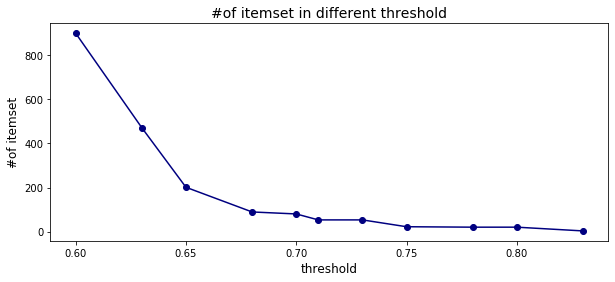

In [942]:
x =  [0.6,0.63,0.65,0.68,0.7,0.71,0.73,0.75,0.78,0.8,0.83]
y = [900,471,201,89,80,53,53,22,20,20,3]
df=pd.DataFrame({'x': [0.6,0.63,0.65,0.68,0.7,0.71,0.73,0.75,0.78,0.8,0.83]
, 'y': [900,471,201,89,80,53,53,22,20,20,3] })
fig = plt.figure(figsize=(10,4))
plt.plot( 'x', 'y', data=df, linestyle='-', marker='o',color='navy')
plt.title('#of itemset in different threshold',fontsize=14)
plt.xlabel('threshold', fontsize=12)
plt.ylabel('#of itemset', fontsize=12)

c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


Text(0.5, 1.0, 'Zoom In')

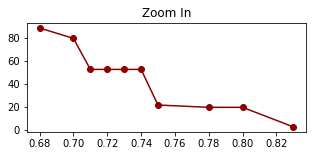

In [928]:
x2= [0.68,0.7,0.71,0.72,0.73,0.74,0.75,0.78,0.8,0.83]
y2= [89,80,53,53,53,53,22,20,20,3]
df=pd.DataFrame({'x': [0.68,0.7,0.71,0.72,0.73,0.74,0.75,0.78,0.8,0.83]
, 'y': [89,80,53,53,53,53,22,20,20,3] })
fig = plt.figure(figsize=(5,2))
plt.plot( 'x', 'y', data=df, linestyle='-', marker='o',color='darkred')
plt.title('Zoom In')
#plt.xlabel('threshold', fontsize=12)
#plt.ylabel('support', fontsize=12)

In [929]:
x1= [0.6,0.7,0.8,0.9]
y1= [452,452,452,328]
y2= [244,224,224,198]
y3= [54,54,54,54]

c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  import sys
c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if sys.path[0] == '':
c:\users\morad\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  app.launch_new_instance()


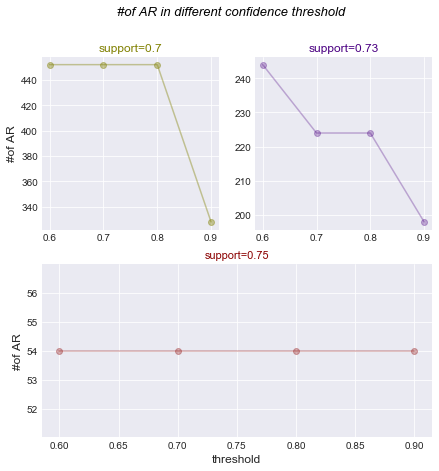

In [993]:
df=pd.DataFrame({'x': x1, 'y1': y1, 'y2': y2, 'y3': y3 })
 
# Cut the window with 2 rows and 2 columns:
plt.style.use('seaborn-darkgrid')
#plt.subplot(212)
f, axs = plt.subplots(2,1,figsize=(7,7))
plt.plot( 'x','y3', data=df, marker='o', color="darkred", alpha=0.3)
plt.title('support=0.75', loc='center', fontsize=11, fontweight=0, color="darkred" )
plt.xlabel('threshold', fontsize=12)
plt.ylabel('#of AR', fontsize=12)
plt.subplot(221)
plt.plot( 'x', 'y1', data=df, marker='o', alpha=0.4,color="olive")
plt.title('support=0.7', loc='center', fontsize=12, fontweight=0, color="olive" )
plt.ylabel('#of AR', fontsize=12)
plt.subplot(222)
plt.plot( 'x','y2', data=df, marker='o', alpha=0.3, color="indigo")
plt.title('support=0.73', loc='center', fontsize=12, fontweight=0, color="indigo" )
plt.suptitle("#of AR in different confidence threshold", fontsize=13, fontweight=0, color='black', style='italic')


plt.show()


Text(0.5, 1.0, 'lift vs Confidence')

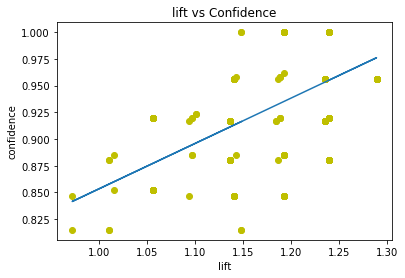

In [718]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('lift vs Confidence')

In [507]:
dt_rul=frequent_itemsets.drop(['length','index'], axis=1)

In [1806]:
rules = association_rules(association_rules_5, metric="confidence", min_threshold=0.6)

In [1816]:
frequent_rules.shape

(0, 11)

In [1817]:
rules['length_ant'] = rules['antecedents'].apply(lambda x: len(x))
rules['length_cons'] = rules['consequents'].apply(lambda x: len(x))
frequent_rules = rules[ (rules['length_ant'] > 3) ]

In [1812]:
frequent_rules.to_csv(r'C:\GH-Dataset\rules-g1.csv', index=None, header=True)

In [108]:
gph_data =  pd.read_csv('Book1 - Copy.csv')

In [109]:
#l=gph_data['edge']

In [110]:
import networkx as nx
df = pd.DataFrame({ 'from':gph_data['to'], 'to':gph_data['from'],'value' : gph_data['value']})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to',create_using=nx.DiGraph() )
 
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'], edge_cmap=plt.cm.Blues)
#plt.figure(num=None, figsize=(10, 10), dpi=1200)


AttributeError: module 'networkx' has no attribute 'from_pandas_edgelist'

In [1538]:
dt_l=pd.DataFrame({'from':gph_data['to'],'to':gph_data['from']})

In [1746]:
G = nx.Graph() 
  
plt.figure(figsize =(9, 12)) 
G.add_edges_from([gph_data[('If','Compare'),
('If','For'),
('If','Index'),
('If','List'),
('If','NameConstant'),
('If','Subscript'),
('If','Tuple'),
('If','Eq'),
('FunctionDef','If')]]) 
  
# original Graph created 
plt.subplot(211) 
print("The original Graph:") 
  
nx.draw_networkx(G) 

KeyError: (('If', 'Compare'), ('If', 'For'), ('If', 'Index'), ('If', 'List'), ('If', 'NameConstant'), ('If', 'Subscript'), ('If', 'Tuple'), ('If', 'Eq'), ('FunctionDef', 'If'))

<Figure size 648x864 with 0 Axes>

In [1511]:
rules.shape

(30, 9)

In [1512]:
rules.to_csv(r'C:\GH-Dataset\rules.csv')

In [1089]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(assertEqual),(tensorflow.python.ops),0.870968,0.838710,0.741935,0.851852,1.015670,0.011446,1.088710
2,(__future__),(assertEqual),0.806452,0.870968,0.741935,0.920000,1.056296,0.039542,1.612903
3,(assertEqual),(__future__),0.870968,0.806452,0.741935,0.851852,1.056296,0.039542,1.306452
4,(division),(assertEqual),0.806452,0.870968,0.741935,0.920000,1.056296,0.039542,1.612903
5,(assertEqual),(division),0.870968,0.806452,0.741935,0.851852,1.056296,0.039542,1.306452
...,...,...,...,...,...,...,...,...,...
95,"(array_ops, tensorflow.python.framework)",(tensorflow.python.ops),0.741935,0.838710,0.741935,1.000000,1.192308,0.119667,inf
96,"(tensorflow.python.ops, tensorflow.python.fram...",(array_ops),0.806452,0.741935,0.741935,0.920000,1.240000,0.143600,3.225806
97,(array_ops),"(tensorflow.python.ops, tensorflow.python.fram...",0.741935,0.806452,0.741935,1.000000,1.240000,0.143600,inf
98,(tensorflow.python.ops),"(array_ops, tensorflow.python.framework)",0.838710,0.741935,0.741935,0.884615,1.192308,0.119667,2.236559


In [585]:
#rules['support']
rules['length_ant'] = rules['antecedents'].apply(lambda x: len(x))
rules['length_cons'] = rules['consequents'].apply(lambda x: len(x))
frequent_rules = rules[ (rules['length_ant'] > 2) ]
#frequent_rules = rules[ (rules['length_cons'] > 2) ]
#and (rules['length_cons'] > 2)
#rules

In [586]:
frequent_rules.shape

(4, 11)

In [435]:
from mlxtend.frequent_patterns import fpgrowth

In [436]:
fpgrow_6 = fpgrowth(dt_train_tfidf, min_support=0.7, use_colnames=True)

In [437]:
fpgrow_6

,support,itemsets
0,0.870968,(assertEqual)
1,0.838710,(tensorflow.python.ops)
2,0.838710,(append)
3,0.741935,(assertAllEqual)
4,0.709677,(assertTrue)
...,...,...
84,0.709677,"(append, ops)"
85,0.741935,"(tensorflow.python.ops, ops, tensorflow.python..."
86,0.709677,"(append, tensorflow.python.framework, ops)"
87,0.709677,"(tensorflow.python.ops, append, ops)"


In [1076]:
rules = association_rules(fpgrow_6, metric="confidence", min_threshold=0.5)

In [1077]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tensorflow.python.ops),(assertEqual),0.838710,0.870968,0.741935,0.884615,1.015670,0.011446,1.118280
1,(assertEqual),(tensorflow.python.ops),0.870968,0.838710,0.741935,0.851852,1.015670,0.011446,1.088710
2,(tensorflow.python.ops),(append),0.838710,0.838710,0.774194,0.923077,1.100592,0.070760,2.096774
3,(append),(tensorflow.python.ops),0.838710,0.838710,0.774194,0.923077,1.100592,0.070760,2.096774
4,(append),(assertEqual),0.838710,0.870968,0.709677,0.846154,0.971510,-0.020812,0.838710
...,...,...,...,...,...,...,...,...,...
447,"(ops, tensorflow.python.framework)","(tensorflow.python.ops, append)",0.741935,0.774194,0.709677,0.956522,1.235507,0.135276,5.193548
448,(tensorflow.python.ops),"(append, tensorflow.python.framework, ops)",0.838710,0.709677,0.709677,0.846154,1.192308,0.114464,1.887097
449,(append),"(tensorflow.python.ops, ops, tensorflow.python...",0.838710,0.741935,0.709677,0.846154,1.140468,0.087409,1.677419
450,(tensorflow.python.framework),"(tensorflow.python.ops, append, ops)",0.806452,0.709677,0.709677,0.880000,1.240000,0.137357,2.419355


In [446]:
rules = pyfpgrowth.generate_association_rules(fpgrow_6,0.8)

In [448]:
#patterns = pyfpgrowth.find_frequent_patterns(dt_train_tfidf, 10)
from gensim.models import LogEntropyModel

In [450]:
def pandas_entropy(column, base):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    return -(vc * np.log(vc)/np.log(base)).sum()

In [451]:
#model = LogEntropyModel(train_token_cl)
train_token_cl.apply(lambda x: pandas_entropy(x,2), axis=1)

0     1.347426
1     3.290522
2     1.003908
3     0.392948
4     0.478578
5     2.345980
6     1.137267
7     0.413622
8     0.404613
9     1.785008
10    5.123702
11    0.212164
12    0.490156
13    2.657800
14    1.858087
15    0.067392
16    0.190851
17    1.601309
18    0.735731
19    1.136205
20    0.792648
21    0.972891
22    0.347572
23    0.859877
24    1.741171
25    0.407716
26    0.327281
27    1.079233
28    1.023904
29    0.873709
30    1.524509
dtype: float64

In [1003]:
df = pd.DataFrame(num_cm,columns=['num-cm'])

In [1007]:
import seaborn as sns

Text(0.5, 1.0, 'Number of commit in Tenserflow Project')

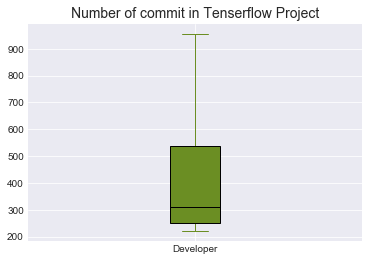

In [1071]:
c='olivedrab'
d='black'
plt.boxplot(num_cm, patch_artist=True,vert=True,
            boxprops=dict(facecolor=c, color=d),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=d))
plt.xticks([1], ['Developer'])
plt.title("Number of commit in Tenserflow Project",fontsize=14)

Text(0.5, 1.0, 'Reputation in stackoverflow')

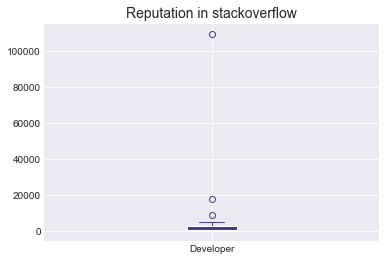

In [1073]:
c='darkslateblue'
d='white'
plt.boxplot(Reputation, patch_artist=True,vert=True, 
            boxprops=dict(facecolor=c, color=d),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=d))
plt.xticks([1], ['Developer'])
plt.title("Reputation in stackoverflow",fontsize=14)

Text(0.5, 1.0, 'Contribution in Github')

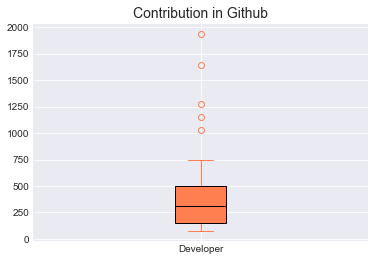

In [1075]:
c='coral'
d='black'
plt.boxplot(co, patch_artist=True,vert=True,
            boxprops=dict(facecolor=c, color=d),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=d),)
plt.xticks([1], ['Developer'])
plt.title("Contribution in Github",fontsize=14)

In [994]:
num_cm = [838,
956,
901,
690,
664,
603,
565,
536,
536,
415,
394,
382,
374,
318,
309,
306,
302,
300,
219,
289,
282,
264,
251,
251,
248,
246,
246,
240,
230]

In [1034]:
Reputation= [
1304,
109665,
779,
1947,
2787,
4606,
771,
411,
5076,
51,
23,
240,
36,
888,
9085,
1219,
719,
2608,
84,
61,
630,
2525,
17739,
51,
3667,
2793,
11,
1796,
535]

In [1042]:
co= [
123,
246,
499,
1275,
1644,
436,
146,
71,
294,
311,
741,
329,
211,
125,
271,
1153,
384,
203,
317,
82,
1938,
318,
1030,
340,
126,
153,
244,
527,
115]

LDA

In [3]:
cv_token =  pd.read_csv('tf_calls_tokens.csv',dtype='object')

In [6]:
#cv_token

In [112]:
All_LDA_tokens = cv_token.drop(['commit_Author', 'commit_msg'], axis=1)

In [113]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfTransformer

In [114]:
LDA_model_ast = LatentDirichletAllocation(n_components=5,random_state=42)

In [115]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(All_LDA_tokens)
X_train_tfidf.shape

(7039, 9243)

In [116]:
LDA_model_ast.fit(All_LDA_tokens)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [117]:
test=All_LDA_tokens.columns.values
#list_vocab = list(vocab)
#len(list_vocab)

In [118]:
len(test)

9243

In [120]:
for index,domain in enumerate(LDA_model_ast.components_):
    print(f'THE TOP 20 WORDS FOR domain #{index}')
    print([test[i] for i in domain.argsort()[-50:]])
    print('\n')

THE TOP 20 WORDS FOR domain #0
['flat_map', '_get_concrete_function_internal_garbage_collected', 'empty', 'create_option', 'constant_value', 'map_structure_up_to', 'composite_tensor', 'Iterator', 'tensor_spec', 'enabled', 'gen_dataset_ops', 'map', 'from_tensor_slices', '_to_tensor_list', 'forward_compatible', 'convert_legacy_structure', 'warn', 'device', 'tf_export', 'add_to_graph', 'set_shape', 'tensorflow.python.util.tf_export', 'colocate_with', 'assert_is_compatible_with', 'tensorflow.python.data.experimental.ops', 'TensorSpec', 'get_shape', 'pack_sequence_as', 'is_compatible_with', 'structure', 'context', 'join', 'set_random_seed', 'flatten', 'tensorflow.python.data.util', 'get_default_graph', 'wraps', 'add', 'name_scope', 'control_dependencies', 'tensorflow.python.util', 'executing_eagerly', 'map_structure', 'deprecated', 'constant', 'array', 'append', 'convert_to_tensor', 'tensorflow.python.ops', 'tensorflow.python.framework']


THE TOP 20 WORDS FOR domain #1
['tensorflow.python.

In [72]:
AST_domain_results = LDA_model_ast.transform(All_LDA_tokens)

In [73]:
cv_token['domain'] = AST_domain_results.argmax(axis=1)

In [87]:
AST_Author_Domain=cv_token[['commit_Author','domain']]

In [88]:
len(AST_Author_Domain)

7039

In [94]:
AST_Author_groupby=AST_Author_Domain.groupby(['domain']).size().reset_index(name='count')

In [101]:
topic_per=((AST_Author_groupby)/len(AST_Author_Domain))*100

In [102]:
topic_per

,domain,count
0,0.000000,57.834920
1,0.014207,11.407870
2,0.028413,1.548515
3,0.042620,4.503481
4,0.056826,24.705214


<BarContainer object of 5 artists>

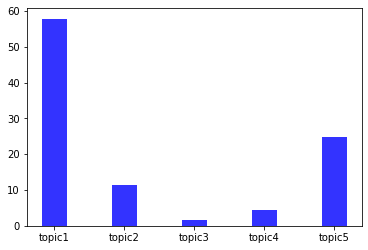

In [106]:
index = ['topic1','topic2','topic3','topic4','topic5']
data = topic_per['count']
bar_width = 0.35
opacity = 0.8
plt.bar(index, data, bar_width,
alpha=opacity,
color='b',
label='NLP')